# K-Nearest Neighbors Algorithm

In [9]:
import os
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
import pickle
import warnings
warnings.filterwarnings('ignore')

## Loading Dataset

In [2]:
# Get the current directory
current_dir = os.getcwd()

# Get the path to the parent directory
parent_dir = os.path.dirname(current_dir)

# Specify the filename
filename = 'final.sqlite'

# Construct the path to the file in the parent directory
file_path = os.path.join(parent_dir, filename)

# Check if the file exists
if os.path.isfile(file_path):
    conn = sqlite3.connect(file_path)
    final = pd.read_sql_query('select * from reviews', conn)
    conn.close()
else:
    print('Please run Text Preprocessing code file')

In [3]:
final.head()

,index,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText
0,0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,bought sever vital can dog food product found ...
1,1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,0,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,product arriv label jumbo salt peanut peanut a...
2,2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,1,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,confect around centuri light pillowi citrus ge...
3,3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,0,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,look secret ingredi robitussin believ found go...
4,4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,1,1350777600,Great taffy,Great taffy at a great price. There was a wid...,great taffi great price wide assort yummi taff...


In [13]:
# Sorting data based on time for time based splitting
final = final.sort_values('Time', axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')
# Now we will perform time based slicing
x_train_raw = final['CleanedText'][0:50000]
y_train = final['Score'][0:50000]
x_cv_raw = final['CleanedText'][50000:70000]
y_cv = final['Score'][50000:70000]
x_test_raw = final['CleanedText'][70000:87773]
y_test = final['Score'][70000:87773]

In [5]:
# Some common initializations used in whole of the assignment
neighbors = np.arange(1,30,1)
mask = neighbors%2 != 0
neighbors = neighbors[mask]

Now we will be training BOW, Tfidf and W2V features using both brute force and kd-tree implementaion of KNN

## Applying KNN-brute force using BOW

### Training

In [6]:
# count_vect = CountVectorizer()
# count_vect.fit(x_train_raw.values)
# filename = 'brute_bow'
# pickle.dump(count_vect, open(filename, 'wb'))

In [14]:
count_vect = pickle.load(open('brute_bow', 'rb'))
x_train = count_vect.transform(x_train_raw.values)
x_cv = count_vect.transform(x_cv_raw.values)
train_auc = []
cv_auc = []
# performing simple cross-validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_train_pred = []
    y_cv_pred = []
    for i in range(0, x_train.shape[0], 1000): # using loop to avoid memory error
        y_train_pred.extend(knn.predict_proba(x_train[i:i+1000,:])[:,1])
    for i in range(0, x_cv.shape[0], 1000):
        y_cv_pred.extend(knn.predict_proba(x_cv[i:i+1000,:])[:,1])
    train_auc.append(roc_auc_score(y_train, y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

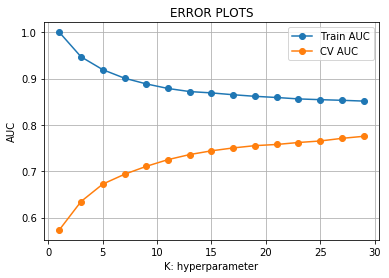

In [16]:
plt.plot(neighbors, train_auc, label='Train AUC', marker='o')
# plt.scatter(neighbors, train_auc, label='Train AUC')
plt.plot(neighbors, cv_auc, label='CV AUC', marker='o')
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel('AUC')
plt.title('ERROR PLOTS')
plt.grid()
plt.show()

In [17]:
# optimal_k = 9
# brute_bow_k = optimal_k
# knn_for_optimal_k = KNeighborsClassifier(n_neighbors=optimal_k)
# knn_for_optimal_k.fit(x_train, y_train)
# filename = 'brute_bow_knn'
# pickle.dump(knn_for_optimal_k, open(filename, 'wb'))